<a href="https://colab.research.google.com/github/subhasravani/machine-learning-projects/blob/main/Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the data
X_train = pd.read_csv('/content/X_Train_Data_Input.csv')
Y_train = pd.read_csv('/content/Y_Train_Data_Target.csv')
X_test = pd.read_csv('/content/X_Test_Data_Input.csv')
Y_test = pd.read_csv('/content/Y_Test_Data_Target.csv')

# Check the shapes of the datasets
print(f'X_train shape: {X_train.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_test shape: {Y_test.shape}')

# Check the data types in X_train to identify non-numeric columns
print(X_train.dtypes)

# Check for non-numeric columns
non_numeric_columns = X_train.select_dtypes(include=['object']).columns
print(f'Non-numeric columns in X_train: {non_numeric_columns}')

non_numeric_columns1 = Y_train.select_dtypes(include=['object']).columns
print(f'Non-numeric columns in Y_train: {non_numeric_columns1}')


X_train shape: (785133, 23)
Y_train shape: (785133, 2)
X_test shape: (261712, 23)
Y_test shape: (261712, 2)
ID           object
Column0     float64
Column1       int64
Column2     float64
Column3     float64
Column4     float64
Column5     float64
Column6     float64
Column7     float64
Column8     float64
Column9     float64
Column10      int64
Column11      int64
Column12      int64
Column13      int64
Column14    float64
Column15    float64
Column16    float64
Column17      int64
Column18    float64
Column19      int64
Column20      int64
Column21      int64
dtype: object
Non-numeric columns in X_train: Index(['ID'], dtype='object')
Non-numeric columns in Y_train: Index(['ID'], dtype='object')


In [ ]:
# Drop the 'ID' column from X_train and X_test
X_train_clean = X_train.drop(columns=['ID'])
X_test_clean = X_test.drop(columns=['ID'])

# Drop the 'ID' column from Y_train and Y_test (assumed target data also has an ID column)
Y_train_clean = Y_train.drop(columns=['ID'])
Y_test_clean = Y_test.drop(columns=['ID'])

# Ensure Y_train and Y_test are in the correct format (1D array)
Y_train_clean = Y_train_clean.values.ravel()  # Convert DataFrame to 1D array
Y_test_clean = Y_test_clean.values.ravel()    # Convert DataFrame to 1D array

# Print the shapes to confirm
print(f'X_train_clean shape: {X_train_clean.shape}')  # Should be 2D
print(f'X_test_clean shape: {X_test_clean.shape}')    # Should be 2D
print(f'Y_train_clean shape: {Y_train_clean.shape}')  # Should be 1D
print(f'Y_test_clean shape: {Y_test_clean.shape}')    # Should be 1D



X_train_clean shape: (785133, 22)
X_test_clean shape: (261712, 22)
Y_train_clean shape: (785133,)
Y_test_clean shape: (261712,)


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define categorical columns for encoding (if any)
categorical_columns = X_train_clean.select_dtypes(include=['object']).columns

# Define a column transformer to handle both numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), X_train_clean.select_dtypes(exclude=['object']).columns),  # Numeric columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)  # Categorical columns (if any)
    ])

# Build a pipeline that first preprocesses the data and then scales it
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler())  # Scale numerical data
])

# Apply the preprocessing pipeline to training and test data
X_train_preprocessed = pipeline.fit_transform(X_train_clean)
X_test_preprocessed = pipeline.transform(X_test_clean)

print(f'Preprocessed X_train shape: {X_train_preprocessed.shape}')
print(f'Preprocessed X_test shape: {X_test_preprocessed.shape}')


Preprocessed X_train shape: (785133, 22)
Preprocessed X_test shape: (261712, 22)


In [ ]:
# Initialize and train the classification model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_preprocessed, Y_train_clean)

# Predict on the test set
Y_test_pred = model.predict(X_test_preprocessed)


In [ ]:
# Evaluate the model
accuracy = accuracy_score(Y_test_clean, Y_test_pred)
clf_report = classification_report(Y_test_clean, Y_test_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{clf_report}")


Accuracy: 0.9769097328360946
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.85      0.92      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.95      0.93    261712
weighted avg       0.98      0.98      0.98    261712



AUC-ROC: 0.9941128542584452


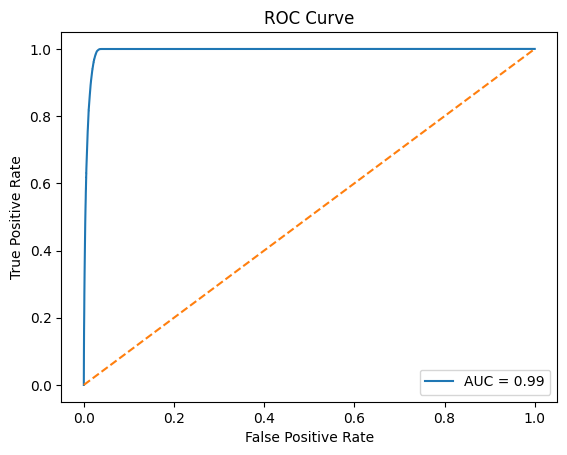

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# If your task is binary classification, calculate the AUC-ROC
Y_test_pred_proba = model.predict_proba(X_test_preprocessed)[:, 1]  # Probability predictions for class 1
auc_roc = roc_auc_score(Y_test_clean, Y_test_pred_proba)
print(f"AUC-ROC: {auc_roc}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test_clean, Y_test_pred_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')  # Plot the random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


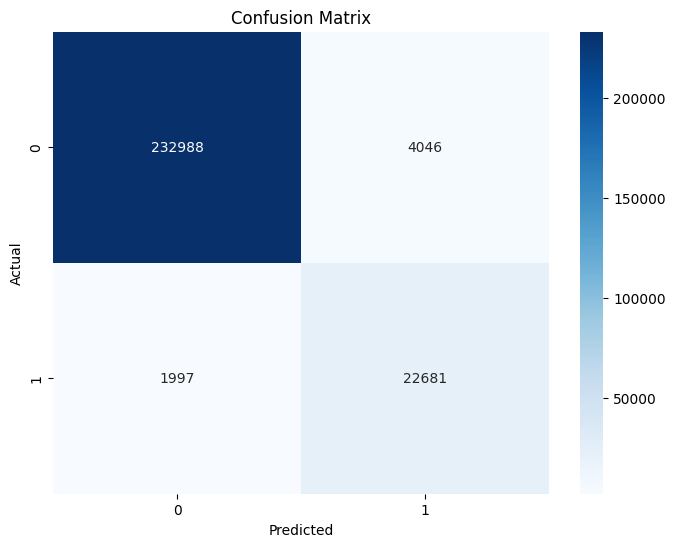

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(Y_test_clean, Y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
